In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('Merged_Data.csv')

# Keep only needed columns and drop missing values
cols_needed = ["Median_Home_Value", "Median_Household_Income", "Vacancy_Rate"]
df = df[cols_needed].dropna()


In [3]:
# Target and predictors
y = df["Median_Home_Value"]
X_income = df[["Median_Household_Income"]]
X_vacancy = df[["Vacancy_Rate"]]

In [4]:
# Train-test split for both simple models (using same random state)
X1_train, X1_test, y1_train, y1_test = train_test_split(
    X_income, y, test_size=0.2, random_state=42
)
X2_train, X2_test, y2_train, y2_test = train_test_split(
    X_vacancy, y, test_size=0.2, random_state=42
)

# Fit models
model_income = LinearRegression().fit(X1_train, y1_train)
model_vacancy = LinearRegression().fit(X2_train, y2_train)

C:\Users\Gabe\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


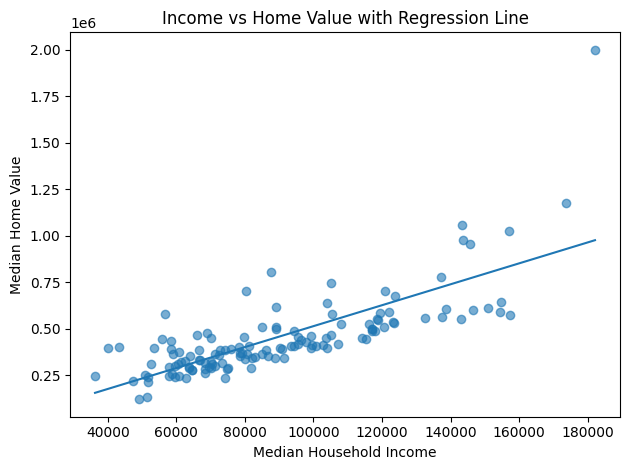

In [5]:
# 1) Scatter + regression line: Income vs Home Value
plt.figure()
plt.scatter(X_income["Median_Household_Income"], y, alpha=0.6)
income_grid = np.linspace(X_income["Median_Household_Income"].min(),
                          X_income["Median_Household_Income"].max(), 100).reshape(-1, 1)
home_pred_income = model_income.predict(income_grid)
plt.plot(income_grid, home_pred_income)
plt.xlabel("Median Household Income")
plt.ylabel("Median Home Value")
plt.title("Income vs Home Value with Regression Line")
plt.tight_layout()
plt.show()

C:\Users\Gabe\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


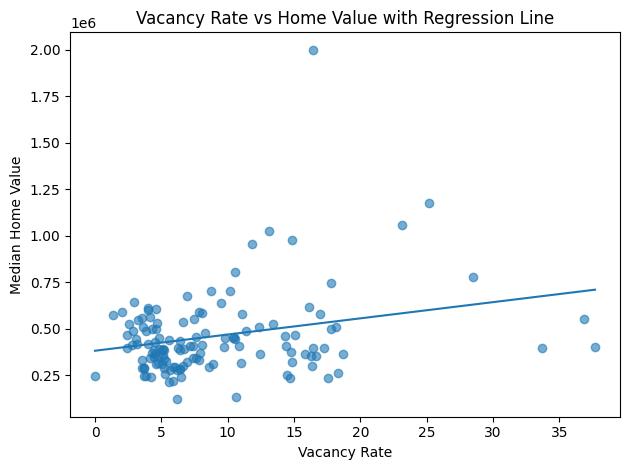

In [6]:
# 2) Scatter + regression line: Vacancy vs Home Value
plt.figure()
plt.scatter(X_vacancy["Vacancy_Rate"], y, alpha=0.6)
vacancy_grid = np.linspace(X_vacancy["Vacancy_Rate"].min(),
                           X_vacancy["Vacancy_Rate"].max(), 100).reshape(-1, 1)
home_pred_vacancy = model_vacancy.predict(vacancy_grid)
plt.plot(vacancy_grid, home_pred_vacancy)
plt.xlabel("Vacancy Rate")
plt.ylabel("Median Home Value")
plt.title("Vacancy Rate vs Home Value with Regression Line")
plt.tight_layout()
plt.show()

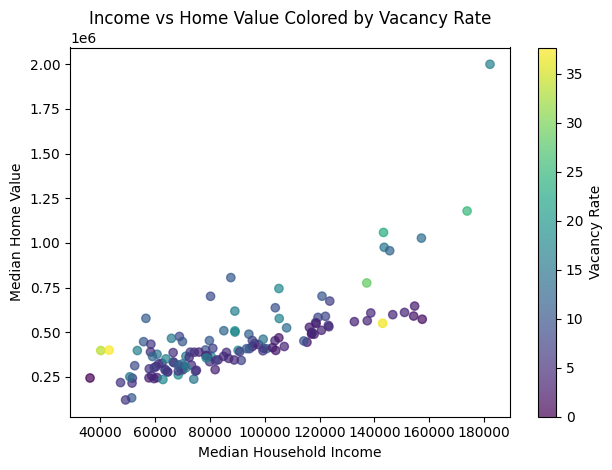

In [7]:
# 3) Interaction visualization: Income vs Home Value, colored by Vacancy Rate
plt.figure()
plt.scatter(
    df["Median_Household_Income"],
    df["Median_Home_Value"],
    c=df["Vacancy_Rate"],
    alpha=0.7
)
cbar = plt.colorbar()
cbar.set_label("Vacancy Rate")
plt.xlabel("Median Household Income")
plt.ylabel("Median Home Value")
plt.title("Income vs Home Value Colored by Vacancy Rate")
plt.tight_layout()
plt.show()